# **Application of Monte Carlo Simulation - Tesla**

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import norm
from matplotlib import pyplot as plt

In [2]:
ticker = 'TSLA' # ticker
intervals = 30 # time steps forecasted into future
iterations = 25 # amount of simulations

In [3]:
tesla = yf.Ticker(ticker)

In [4]:
df = tesla.history(period = "max")

In [5]:
df.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [6]:
df.tail(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-10-07,785.460022,805.000000,783.380005,793.609985,19195800,0,0.0
2021-10-08,796.210022,796.380005,780.909973,785.489990,16711100,0,0.0
2021-10-11,787.650024,801.239990,785.500000,791.940002,14200300,0,0.0
2021-10-12,800.929993,812.320007,796.570007,805.719971,22020000,0,0.0
2021-10-13,810.469971,815.409973,805.794922,811.080017,14010391,0,0.0


In [7]:
df = df.rename(columns={"Close": ticker})
df = df[['TSLA']]
df.head()

,TSLA
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840
2010-07-06,3.222


In [8]:
#Take Log
log_df = np.log(1 + df.pct_change())

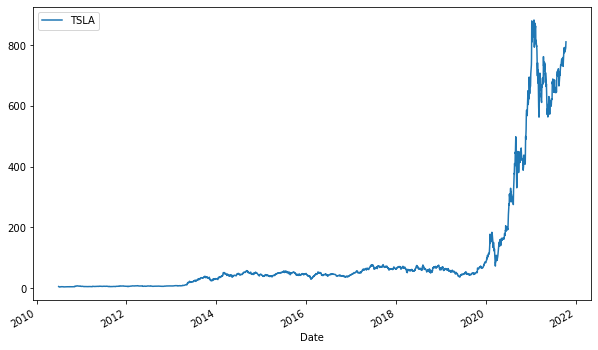

In [9]:
#Plot of asset historical closing price
df.plot(figsize=(10, 6));

<AxesSubplot:xlabel='Date'>

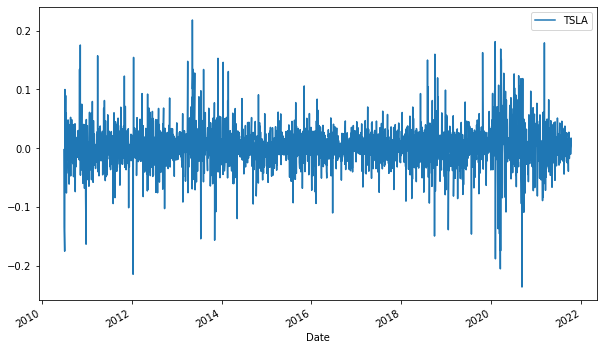

In [10]:
#Plot of log returns
log_df.plot(figsize = (10, 6))

In [11]:
#Setting up drift and random component in relation to asset data
u = log_df.mean()
var = log_df.var()
drift = u - (0.5 * var)
stdv = log_df.std()

In [12]:
returns = np.exp(drift.values + stdv.values * norm.ppf(np.random.rand(intervals, iterations)))

In [13]:
#Takes last data point as startpoint point for simulation
S_zero = df.iloc[-1]
list_pred = np.zeros_like(returns)
list_pred[0] = S_zero

In [14]:
#Applies Monte Carlo simulation in asset
for t in range(1, intervals):
    list_pred[t] = list_pred[t - 1] * returns[t]

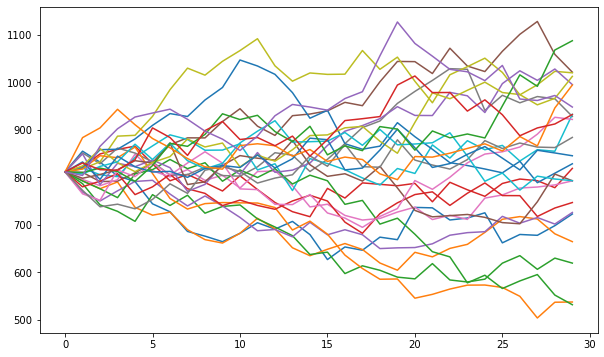

In [15]:
#Plot simulations
plt.figure(figsize=(10,6))
plt.plot(list_pred);

### * Large volatility
### * From today's price of 800, can swing from 500 to 1100